<a href="https://colab.research.google.com/github/rana6-12/Final-Project-ITI/blob/main/Final_Project_ITI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ٌRana Yasser Anter**

**Upload Data Set**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd

# Replace with the actual path to your file in Google Drive
file_path = '/content/drive/MyDrive/IMDB Dataset.csv'

try:
  df = pd.read_csv(file_path)
  display(df.head())
except FileNotFoundError:
  print(f"Error: The file '{file_path}' was not found. Please check the path and try again.")
except Exception as e:
  print(f"An error occurred: {e}")

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df.shape

(50000, 2)

In [8]:
df.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


**# Check columns, types, missing**

In [9]:
print(df.columns)
print(df.dtypes)
print(df.isna().sum())

Index(['review', 'sentiment'], dtype='object')
review       object
sentiment    object
dtype: object
review       0
sentiment    0
dtype: int64


**# Class balance**

sentiment
positive    25000
negative    25000
Name: count, dtype: int64


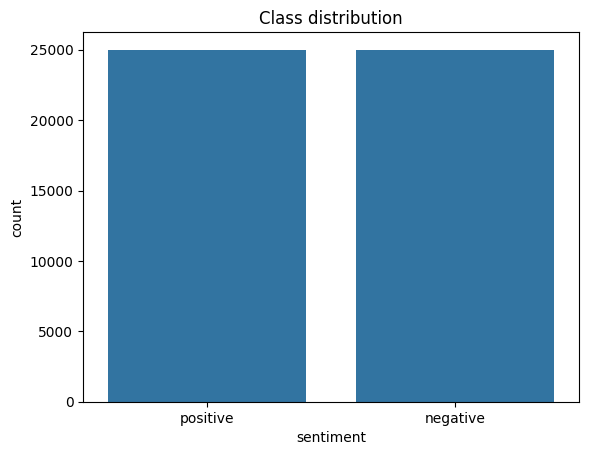

In [10]:
print(df['sentiment'].value_counts())
sns.countplot(x='sentiment', data=df)
plt.title("Class distribution")
plt.show()

**# Length features**

In [11]:
df['n_chars'] = df['review'].astype(str).str.len()
df['n_tokens'] = df['review'].astype(str).str.split().str.len()
print(df[['n_chars','n_tokens']].describe())

            n_chars      n_tokens
count  50000.000000  50000.000000
mean    1309.431020    231.156940
std      989.728014    171.343997
min       32.000000      4.000000
25%      699.000000    126.000000
50%      970.000000    173.000000
75%     1590.250000    280.000000
max    13704.000000   2470.000000


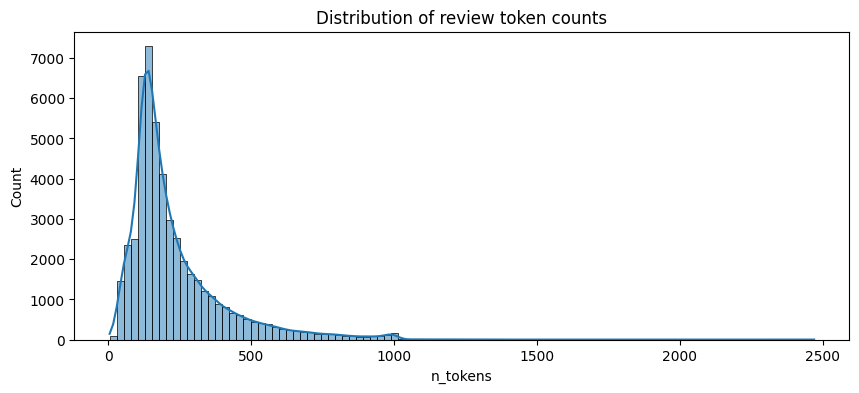

In [12]:
plt.figure(figsize=(10,4))
sns.histplot(df['n_tokens'], bins=100, kde=True)
plt.title("Distribution of review token counts")
plt.show()

**Preprocessing :generic **

In [13]:
import re, string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

**
# Download NLTK data once**

In [14]:
nltk.download('stopwords')
nltk.download('wordnet')

STOPWORDS = set(stopwords.words('english'))
LEMMATIZER = WordNetLemmatizer()

URL_RE = re.compile(r'https?://\S+|www\.\S+')
HTML_RE = re.compile(r'<.*?>')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [15]:
def generic_preprocess(text):
    # 1. lowercase
    t = str(text).lower()
    # 2. remove urls & html tags
    t = URL_RE.sub(' ', t)
    t = HTML_RE.sub(' ', t)
    # 3. remove punctuation
    t = t.translate(str.maketrans('', '', string.punctuation))
    # 4. keep letters only (optional) -> here we allow spaces and letters
    t = re.sub(r'[^a-z\s]', ' ', t)
    # 5. collapse spaces
    t = re.sub(r'\s+', ' ', t).strip()
    # 6. tokenize + remove stopwords + lemmatize
    tokens = [w for w in t.split() if w not in STOPWORDS]
    tokens = [LEMMATIZER.lemmatize(w) for w in tokens]
    return " ".join(tokens)

# Test
print(generic_preprocess(df['review'].iloc[0]))

one reviewer mentioned watching oz episode youll hooked right exactly happened first thing struck oz brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda em city home manyaryans muslim gangsta latino christian italian irish moreso scuffle death stare dodgy dealing shady agreement never far away would say main appeal show due fact go show wouldnt dare forget pretty picture painted mainstream audience forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high level graphic violence violence injustice crooked guard wholl sold nickel inmate wholl kill order get away well mannered middle class inmate turned prison bitch due lac

**Preprocessing**

In [16]:
import unicodedata


# normalize and remove non-letter characters (keeps spaces)

In [17]:
def strip_non_letters(text):

    norm = unicodedata.normalize('NFKD', str(text))
    return re.sub(r'[^a-zA-Z\s]', ' ', norm)

 # remove emojis / special by keeping only letters and spaces

In [18]:
def imdb_preprocess(text):
    t = str(text).lower()
    t = URL_RE.sub(' ', t)
    t = HTML_RE.sub(' ', t)
    t = strip_non_letters(t)
    t = re.sub(r'\s+', ' ', t).strip()
    tokens = [w for w in t.split() if w not in STOPWORDS]
    tokens = [LEMMATIZER.lemmatize(w) for w in tokens]
    return " ".join(tokens)

# Apply both pipelines and store columns

In [19]:
df['clean_generic'] = df['review'].apply(generic_preprocess)
df['clean_imdb'] = df['review'].apply(imdb_preprocess)

# map sentiments to numbers

In [20]:
df['label'] = df['sentiment'].map({'positive':1,'negative':0})

# show examples

In [21]:
df[['review','clean_generic','clean_imdb','label']].head(6)

,review,clean_generic,clean_imdb,label
0,One of the other reviewers has mentioned that ...,one reviewer mentioned watching oz episode you...,one reviewer mentioned watching oz episode hoo...,1
1,A wonderful little production. <br /><br />The...,wonderful little production filming technique ...,wonderful little production filming technique ...,1
2,I thought this was a wonderful way to spend ti...,thought wonderful way spend time hot summer we...,thought wonderful way spend time hot summer we...,1
3,Basically there's a family where a little boy ...,basically there family little boy jake think t...,basically family little boy jake think zombie ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter matteis love time money visually stunni...,petter mattei love time money visually stunnin...,1
5,"Probably my all-time favorite movie, a story o...",probably alltime favorite movie story selfless...,probably time favorite movie story selflessnes...,1


youssef tarek abdelmonem

In [22]:
orig_tokens = df['review'].astype(str).str.split().str.len()
gen_tokens = df['clean_generic'].astype(str).str.split().str.len()
imdb_tokens = df['clean_imdb'].astype(str).str.split().str.len()


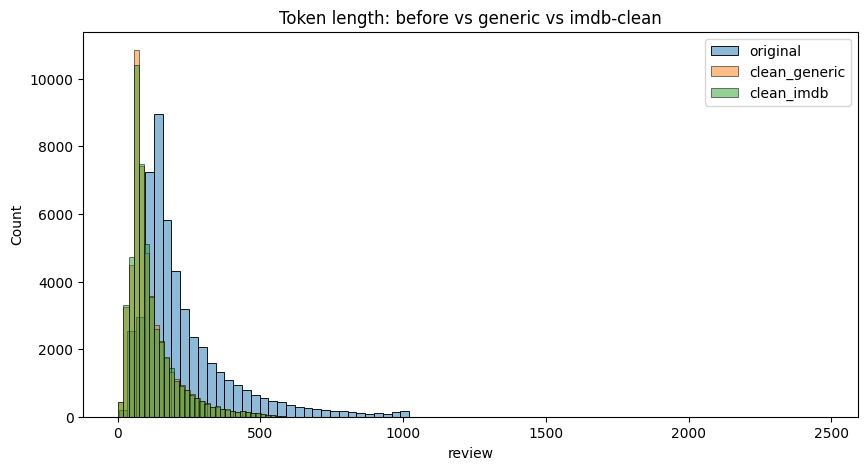

In [23]:
plt.figure(figsize=(10,5))
sns.histplot(orig_tokens, bins=80, label='original', alpha=0.5)
sns.histplot(gen_tokens, bins=80, label='clean_generic', alpha=0.5)
sns.histplot(imdb_tokens, bins=80, label='clean_imdb', alpha=0.5)
plt.legend()
plt.title("Token length: before vs generic vs imdb-clean")
plt.show()


In [24]:
from wordcloud import WordCloud
pos_text = " ".join(df[df['label']==1]['clean_imdb'].values)
neg_text = " ".join(df[df['label']==0]['clean_imdb'].values)


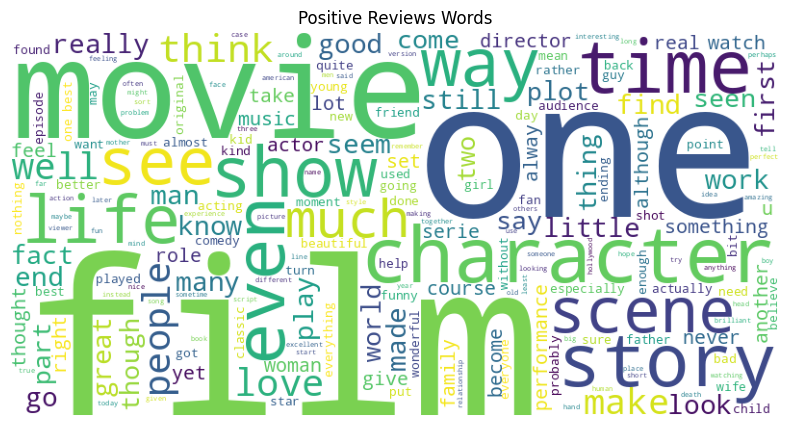

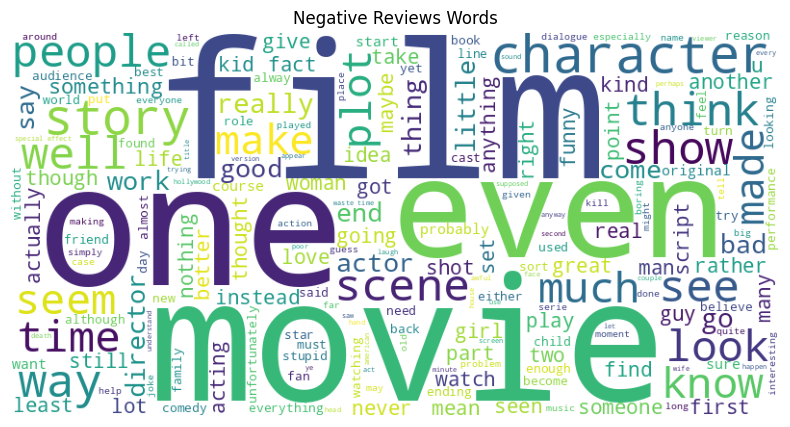

In [25]:
wc_pos = WordCloud(width=800,height=400,background_color='white').generate(pos_text)
wc_neg = WordCloud(width=800,height=400,background_color='white').generate(neg_text)
plt.figure(figsize=(12,5))
plt.imshow(wc_pos); plt.axis('off'); plt.title("Positive Reviews Words")
plt.show()
plt.figure(figsize=(12,5))
plt.imshow(wc_neg); plt.axis('off'); plt.title("Negative Reviews Words")
plt.show()


*** Hazem Mohamed Mahmoud Hassan **

In [26]:
# Import required libraries and prepare the dataset

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [27]:
X = df['clean_imdb'].values
y = df['label'].values

In [28]:
#  Split dataset into Train and Test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train size:", len(X_train))
print("Test size:", len(X_test))

Train size: 40000
Test size: 10000


In [29]:
#  Vectorize text using TF-IDF


tfidf = TfidfVectorizer(max_features=50000, ngram_range=(1,2))

X_train_t = tfidf.fit_transform(X_train)
X_test_t  = tfidf.transform(X_test)

print("Train TF-IDF shape:", X_train_t.shape)
print("Test  TF-IDF shape:", X_test_t.shape)

Train TF-IDF shape: (40000, 50000)
Test  TF-IDF shape: (10000, 50000)


In [30]:
# Train Logistic Regression model


logreg = LogisticRegression(max_iter=400)
logreg.fit(X_train_t, y_train)

print("Logistic Regression training done.")

Logistic Regression training done.


In [31]:
#  Evaluate the model performance

pred = logreg.predict(X_test_t)

print("Accuracy (TF-IDF + LR):", accuracy_score(y_test, pred))
print(classification_report(y_test, pred, target_names=['neg','pos']))

Accuracy (TF-IDF + LR): 0.9024
              precision    recall  f1-score   support

         neg       0.91      0.89      0.90      5000
         pos       0.89      0.92      0.90      5000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



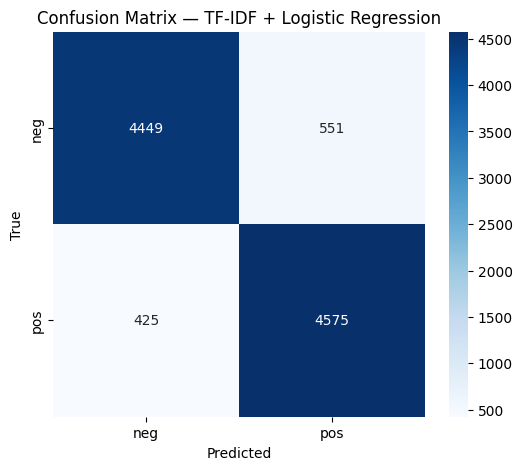

In [32]:
# Confusion Matrix and Heatmap visualization

import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['neg','pos'],
    yticklabels=['neg','pos']
)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix — TF-IDF + Logistic Regression')
plt.show()


**Yousef** **Mohamed** **Abdeltawab** **Mohamed**

In [33]:
# Save the Vectorizer (TF-IDF) and Logistic Regression Model

import joblib
import os

In [34]:
os.makedirs("artifacts", exist_ok=True)
joblib.dump(tfidf, "artifacts/tfidf.joblib")
joblib.dump(logreg, "artifacts/logreg.joblib")
print(" tfidf.joblib و logreg.joblib artifacts/")

 tfidf.joblib و logreg.joblib artifacts/


In [35]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from sklearn.model_selection import train_test_split

In [36]:
# Hyperparameters
VOCAB_SIZE = 20000
SEQ_LEN    = 200    # Pad/Truncate each sentence to 200 tokens
EMBED_DIM  = 100
BATCH      = 128
EPOCHS     = 5

In [37]:
# Data Preparation
texts  = df["clean_imdb"].astype(str).values
labels = df["label"].values

In [38]:
# Train/Test Split
X_tr, X_te, y_tr, y_te = train_test_split(
    texts, labels,
    test_size=0.2,
    random_state=42,
    stratify=labels
)

In [39]:
# Text Vectorization Layer
vectorize_layer = layers.TextVectorization(
    max_tokens=VOCAB_SIZE,
    output_mode="int",
    output_sequence_length=SEQ_LEN
)

In [40]:
# Fit vectorizer on training data
vectorize_layer.adapt(
    tf.data.Dataset.from_tensor_slices(X_tr).batch(256)
)

In [41]:
# Dataset Pipeline
def make_dataset(X, y, batch=BATCH, shuffle=True):
    ds = tf.data.Dataset.from_tensor_slices((X, y))
    if shuffle:
        ds = ds.shuffle(10000, seed=42)
    ds = ds.batch(batch).prefetch(tf.data.AUTOTUNE)
    return ds

In [42]:
# Train/Validation datasets
train_ds = make_dataset(X_tr, y_tr)
val_ds   = make_dataset(X_te, y_te, shuffle=False)

# Ahmed RAbie

# MODEL 1: Embedding -> Flatten -> Dense

In [43]:
model = models.Sequential([
    vectorize_layer, # Add the vectorize_layer here
    layers.Embedding(VOCAB_SIZE, EMBED_DIM, input_length=SEQ_LEN),

    layers.Flatten(),

    layers.Dense(128, activation='relu'),

    layers.Dropout(0.4),

    layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


# Compile the model

In [44]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text_vectorization              │ ?                      │   0 (unbuilt) │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

# callbacks

In [45]:
cb = [
    callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True),

    callbacks.ModelCheckpoint('artifacts/keras_imdb_best.h5', save_best_only=True)
]


# Train the model


In [46]:
history = model.fit(train_ds, validation_data=val_ds, epochs=EPOCHS, callbacks=cb)


Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.7235 - loss: 0.4997

313/313 ━━━━━━━━━━━━━━━━━━━━ 47s 141ms/step - accuracy: 0.7238 - loss: 0.4993 - val_accuracy: 0.8862 - val_loss: 0.2767
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 81s 139ms/step - accuracy: 0.9550 - loss: 0.1286 - val_accuracy: 0.8689 - val_loss: 0.3869
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 44s 141ms/step - accuracy: 0.9966 - loss: 0.0132 - val_accuracy: 0.8724 - val_loss: 0.4535


# Lighter alternative (recommended for weaker devices)

In [47]:
model2 = models.Sequential([
    layers.Embedding(VOCAB_SIZE, EMBED_DIM, input_length=SEQ_LEN),
    layers.GlobalAveragePooling1D(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])


# **Youssef Magdy Ahmed**

##Deep model evaluation + training


**Evaluate**


In [48]:
loss, acc = model.evaluate(val_ds, verbose=0)
print("Test accuracy (NN):", acc)

Test accuracy (NN): 0.8862000107765198


#Predictions (probabilities)


In [49]:
import numpy as np
y_probs = model.predict(val_ds)
y_pred = (y_probs.flatten() >= 0.5).astype(int)

79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step


# True labels in same order


In [50]:
y_true = np.concatenate([y for _,y in val_ds], axis=0)

In [51]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
print(classification_report(y_true, y_pred, target_names=['neg','pos']))
print("ROC AUC:", roc_auc_score(y_true, y_probs))

              precision    recall  f1-score   support

         neg       0.89      0.88      0.88      5000
         pos       0.88      0.90      0.89      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

ROC AUC: 0.9537217600000001


# Confusion matrix plot

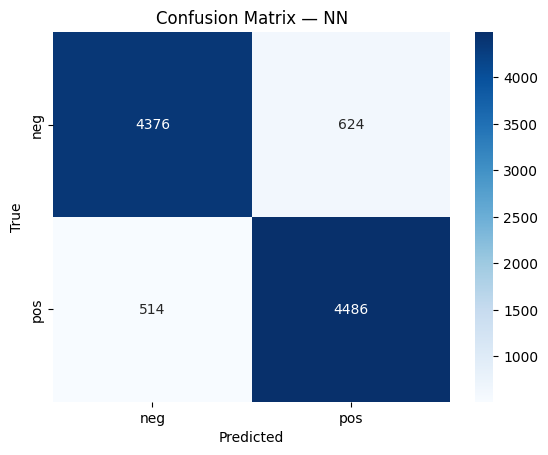

In [52]:
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['neg','pos'], yticklabels=['neg','pos'])
plt.xlabel('Predicted'); plt.ylabel('True'); plt.title('Confusion Matrix — NN')
plt.show()

# plot history


Text(0.5, 1.0, 'Loss')

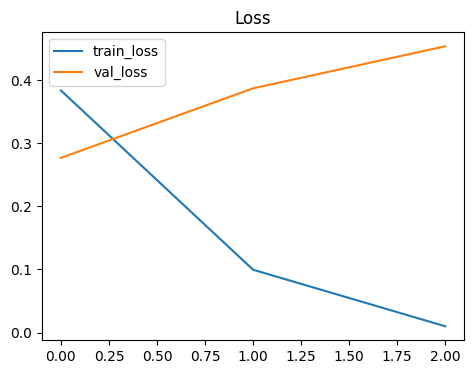

In [53]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train_loss'); plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(); plt.title('Loss')

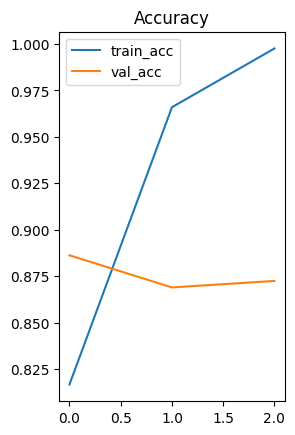

In [54]:
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train_acc'); plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend(); plt.title('Accuracy')
plt.show()

# Ahmed Rabie

# TF-IDF + Logistic Regression are already saved in artifacts/

In [55]:
# vectorize_layer.save('artifacts/text_vectorizer') # Remove this line

model.save('artifacts/keras_imdb_model.keras')

In [58]:
model2.save('artifacts/keras_imdb_model2.keras')

In [59]:
import gradio as gr
import joblib

tfidf = joblib.load("artifacts/tfidf.joblib")
logreg = joblib.load("artifacts/logreg.joblib")

def predict_sentiment(text):
    vec = tfidf.transform([text])
    pred = logreg.predict(vec)[0]
    return "Positive 😀" if pred == 1 else "Negative 😡"

demo = gr.Interface(fn=predict_sentiment, inputs="text", outputs="text", title="IMDB Sentiment Analysis")
demo.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://455948475af5a231f8.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
